In [1]:
import pandas as pd
import re
from bs4 import BeautifulSoup

# Simplified preprocessing function
def preprocess_text_simple(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    # Lowercase the text
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = text.split()
    # Join tokens back into a single string
    return ' '.join(tokens)

# Load datasets
train_file_path = 'train.csv'  # Replace with your file path
valid_file_path = 'valid.csv'  # Replace with your file path

train_data = pd.read_csv(train_file_path)
valid_data = pd.read_csv(valid_file_path)

# Apply preprocessing to the Title and Body columns
train_data['Processed_Title'] = train_data['Title'].apply(preprocess_text_simple)
train_data['Processed_Body'] = train_data['Body'].apply(preprocess_text_simple)

valid_data['Processed_Title'] = valid_data['Title'].apply(preprocess_text_simple)
valid_data['Processed_Body'] = valid_data['Body'].apply(preprocess_text_simple)

# Save processed datasets if needed
train_data.to_csv('processed_train.csv', index=False)
valid_data.to_csv('processed_valid.csv', index=False)

print("Preprocessing completed. Processed data saved to 'processed_train.csv' and 'processed_valid.csv'.")


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8220\3040904915.py:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8220\3040904915.py:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
D:\python 3.8.10\lib\html\parser.py:171: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the Beau

Preprocessing completed. Processed data saved to 'processed_train.csv' and 'processed_valid.csv'.


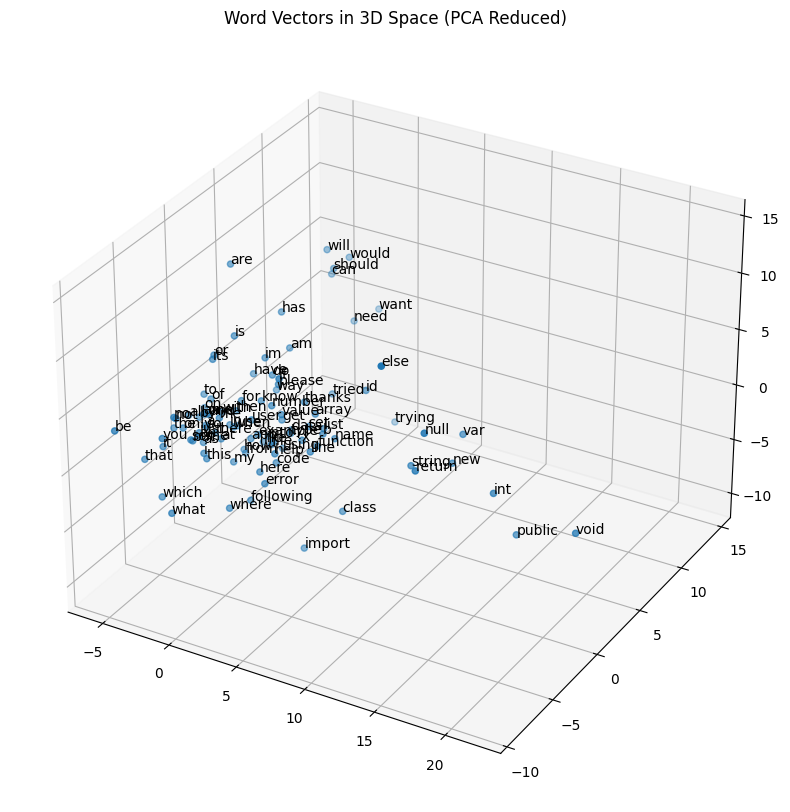

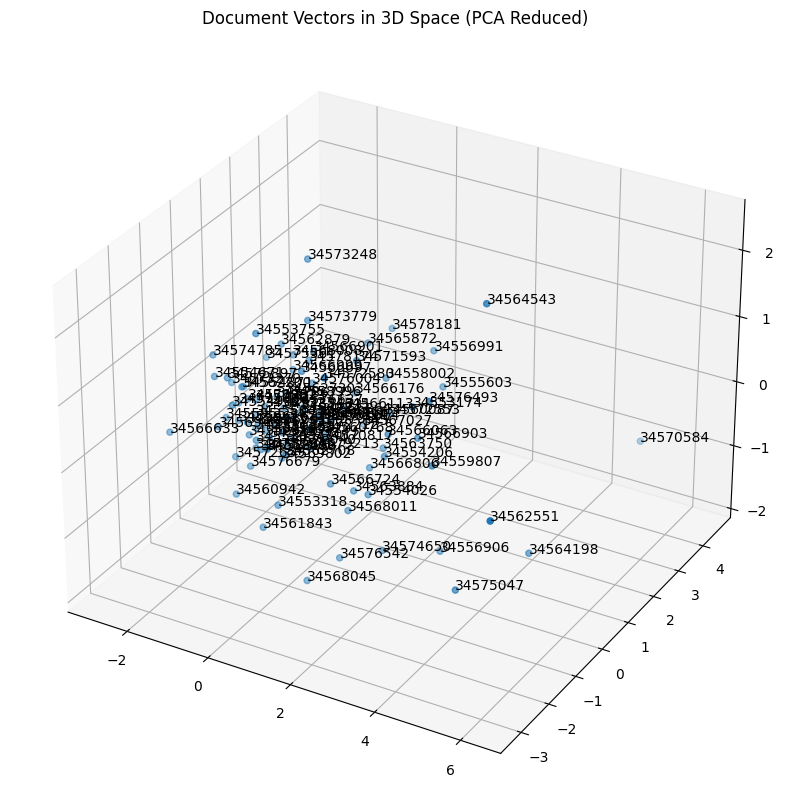

Similar Questions:
                                                   Title  \
43171  Python: remove tuple from list similar to tupl...   
32801  Is there a way to declare all the values in th...   
31734                       List of exe to open randomly   
26473                            Indexing list in Python   
7232                 Tensorflow: Writing an Op in Python   

                                                    Body  \
43171  i am new to python and to programming in gener...   
32801  <p>I have a list a[i,j,k]. Out of this, I need...   
31734  <p>I would like to create a program where I ha...   
26473  I am trying to create a list in Python but I d...   
7232   <p>I would like to write an Op in Python. This...   

                           Tags  
43171    <python><list><tuples>  
32801  <python><arrays><syntax>  
31734            <c++><windows>  
26473            <python><list>  
7232               <tensorflow>  


In [12]:
import pandas as pd
from gensim.models import Word2Vec
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load preprocessed datasets
train_file_path = 'processed_train.csv'  # Replace with your file path
train_data = pd.read_csv(train_file_path)

# Ensure all entries in Processed_Body are strings
train_data['Processed_Body'] = train_data['Processed_Body'].fillna("").astype(str)

# Train Word2Vec model
sentences = train_data['Processed_Body'].apply(lambda x: x.split()).tolist()
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

# Generate document vectors by averaging word vectors
def document_vector(doc):
    words = doc.split()
    vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(word2vec_model.vector_size)

train_data['Doc_Vector'] = train_data['Processed_Body'].apply(document_vector)


# Visualize word vectors in 3D space
def visualize_word_vectors_3d(model, num_words=100):
    words = list(model.wv.index_to_key)[:num_words]
    vectors = np.array([model.wv[word] for word in words])

    # Reduce dimensions to 3D using PCA
    pca = PCA(n_components=3)
    reduced_vectors = pca.fit_transform(vectors)

    # Plot the 3D space
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2])

    for i, word in enumerate(words):
        ax.text(reduced_vectors[i, 0], reduced_vectors[i, 1], reduced_vectors[i, 2], word)

    plt.title("Word Vectors in 3D Space (PCA Reduced)")
    plt.show()

visualize_word_vectors_3d(word2vec_model, num_words=100)

# Visualize document vectors in 3D space
def visualize_doc_vectors_3d(data, num_docs=100):
    vectors = np.array(data['Doc_Vector'].tolist()[:num_docs])

    # Reduce dimensions to 3D using PCA
    pca = PCA(n_components=3)
    reduced_vectors = pca.fit_transform(vectors)

    # Plot the 3D space
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2])

    for i, doc_id in enumerate(data['Id'][:num_docs]):
        ax.text(reduced_vectors[i, 0], reduced_vectors[i, 1], reduced_vectors[i, 2], str(doc_id))

    plt.title("Document Vectors in 3D Space (PCA Reduced)")
    plt.show()

visualize_doc_vectors_3d(train_data)


# Retrieve similar questions for a query
def retrieve_similar_questions(query, data, top_n=5):
    # Preprocess the query
    query_processed = preprocess_text_simple(query)
    # Compute query vector
    query_vector = document_vector(query_processed)
    # Compute cosine similarity
    similarities = cosine_similarity([query_vector], data['Doc_Vector'].tolist())
    # Get top N similar questions
    top_indices = similarities[0].argsort()[-top_n:][::-1]
    return data.iloc[top_indices][['Title', 'Body', 'Tags']]

# Example query
query = "How to implement a linked list in Python?"
similar_questions = retrieve_similar_questions(query, train_data)

print("Similar Questions:")
print(similar_questions)


In [5]:
# Randomly sample 10% of validation data
validation_subset = valid_data.sample(frac=0.1, random_state=42)

# Preprocess validation data
validation_subset['Processed_Body'] = validation_subset['Body'].apply(preprocess_text_simple)
validation_subset['Doc_Vector'] = validation_subset['Processed_Body'].apply(document_vector)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8220\3040904915.py:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
D:\python 3.8.10\lib\html\parser.py:171: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


In [6]:
from sklearn.neighbors import NearestNeighbors

# Prepare training data vectors and tags
train_vectors = np.array(train_data['Doc_Vector'].tolist())
train_tags = train_data['Tags'].tolist()

# Initialize KNN model
k = 5  # Number of neighbors
knn_model = NearestNeighbors(n_neighbors=k, metric='cosine')
knn_model.fit(train_vectors)

# Find nearest neighbors for validation data
def find_nearest_neighbors(doc_vector):
    distances, indices = knn_model.kneighbors([doc_vector])
    return indices[0]  # Return the indices of the neighbors

validation_subset['Nearest_Neighbors'] = validation_subset['Doc_Vector'].apply(find_nearest_neighbors)


In [13]:
from collections import Counter

def predict_tags_weighted(neighbors, similarities):
    neighbor_tags = [train_tags[i] for i in neighbors]
    flat_tags = []
    for tags, similarity in zip(neighbor_tags, similarities):
        for tag in tags.split():
            flat_tags.append((tag, similarity))
    # Sort tags by weighted similarity
    tag_counter = Counter()
    for tag, weight in flat_tags:
        tag_counter[tag] += weight
    return [tag for tag, _ in tag_counter.most_common(3)]

validation_subset['Predicted_Tags'] = validation_subset.apply(
    lambda row: predict_tags_weighted(row['Nearest_Neighbors'], row['Nearest_Neighbors_Similarities']),
    axis=1
)



KeyError: 'Nearest_Neighbors_Similarities'

In [8]:
def calculate_accuracy(row):
    actual_tags = set(row['Tags'].split())
    predicted_tags = set(row['Predicted_Tags'])
    return len(actual_tags & predicted_tags) > 0  # Intersection non-empty

validation_subset['Correct_Tag'] = validation_subset.apply(calculate_accuracy, axis=1)
accuracy = validation_subset['Correct_Tag'].mean()

print(f"Tagging Accuracy: {accuracy * 100:.2f}%")


Tagging Accuracy: 4.67%


In [10]:
validation_subset['Correct_Tag']

11499    False
6475     False
13167     True
862      False
5970     False
         ...  
2655     False
11672    False
8990     False
8517     False
13492    False
Name: Correct_Tag, Length: 1500, dtype: bool

In [9]:
# Successful predictions
successful_examples = validation_subset[validation_subset['Correct_Tag']].head(5)
print("Successful Predictions:")
print(successful_examples[['Body', 'Tags', 'Predicted_Tags']])

# Unsuccessful predictions
unsuccessful_examples = validation_subset[~validation_subset['Correct_Tag']].head(5)
print("\nUnsuccessful Predictions:")
print(unsuccessful_examples[['Body', 'Tags', 'Predicted_Tags']])


Successful Predictions:
                                                    Body  \
13167  <p><strong>not all code paths return a value e...   
2250   <p>I mean as soon as you click the checkbox to...   
12807  <p>This is my life problem how do I keep the l...   
2312           print("Hello there")\r\n    name=input...   
8797   Does anyone have any ideas of how I can create...   

                          Tags  \
13167                     <c#>   
2250   <javascript><html><css>   
12807                    <php>   
2312      <python><python-3.x>   
8797                  <python>   

                                          Predicted_Tags  
13167                      [<c++>, <c><algorithm>, <c#>]  
2250   [<javascript><jquery><ajax>, <javascript><html...  
12807               [<php>, <r><sas>, <java><word-wrap>]  
2312            [<python>, <ruby>, <python><python-3.x>]  
8797         [<python>, <javascript>, <python><pytorch>]  

Unsuccessful Predictions:
                             